In [1]:
#In this code, we implement the Metropolis algorithm
import numpy as np
import matplotlib.pyplot as plt

N = 20
eps = 1.4
N_cor = 20
N_cf = 1000
Nbstrap = 100
a = 0.5
x = np.zeros(N)
G = np.zeros((N_cf,N))
errorbars = np.zeros(N-1)

def update(x):
    for j in range(0,N):        
        old_x = x[j]    # save original value    
        old_Sj = S(j,x)
        x[j] = x[j] + np.random.uniform(-eps,eps)   # update x[j]
        dS = S(j,x) - old_Sj                        # change in action
        if dS > 0 and np.exp(-dS) < np.random.uniform(0,1):
            x[j] = old_x  # restore old value  

def S(j,x):                                         #harmonic oscillator action
    jp = (j+1)%N
    jm = (j-1)%N
    return a*x[j]**2/2+ x[j]*(x[j]-x[jp]-x[jm])/a 

def compute_G(x,n):
    g = 0
    for j in range (0,N):
        g = g+x[j]*x[(j+n)%N]
    return g/N

def MCaverage(x,G):
    for j in range (0,N):   # initialize x
        x[j] = 0
    for j in range (0,5*N_cor): # thermalize x
        update(x)
    for alpha in range (0,N_cf):    # loop on random paths 
        for j in range (0,N_cor):
            update(x)
        for n in range(0,N):
           G[alpha][n] = compute_G(x,n)
    for n in range (0,N): #compute MC averages
        avg_G = 0
        for alpha in range(0,N_cf):
            avg_G = avg_G + G[alpha][n]
        avg_G = avg_G/N_cf
        print("G(%d) = %g" % (n,avg_G))
    
MCaverage(x,G)

G(0) = 0.482892
G(1) = 0.295699
G(2) = 0.179342
G(3) = 0.107255
G(4) = 0.0645788
G(5) = 0.0393443
G(6) = 0.0268018
G(7) = 0.0177221
G(8) = 0.0121497
G(9) = 0.0124542
G(10) = 0.00940128
G(11) = 0.0124542
G(12) = 0.0121497
G(13) = 0.0177221
G(14) = 0.0268018
G(15) = 0.0393443
G(16) = 0.0645788
G(17) = 0.107255
G(18) = 0.179342
G(19) = 0.295699


The array $G(t)$ is the Euclidean two point correlator for the harmonic oscillator. Obtain the the energy splittings via 
\begin{equation}
\Delta E(t) = \ln \frac{G(t)}{G(t+1)}
\end{equation}
If time permits, obtain the error bars through a resampling method like bootstrap or jackknife

In [ ]:
#Your implementation of the energy splittings here

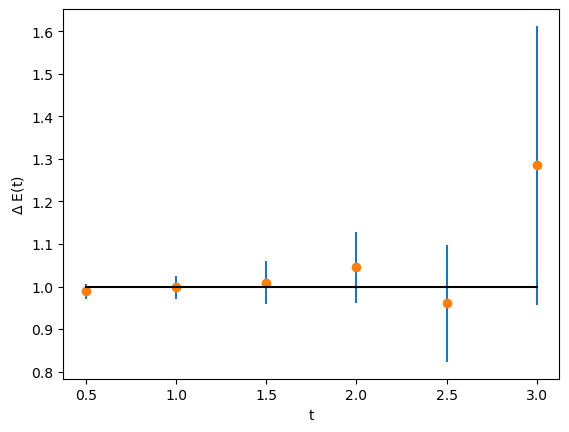